# Data Story Notebook
This is the Jupyter notebook for the 'Data Story' portion of my first Springboard capstone project. The goal of this project is to create a model that predicts what decade a song is form based on its lyrical content. This will be where I do my exploratory data analysis of the lyrical content of the lyrics of the songs, and of the data in general.

In [9]:
# Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import os
sns.set()

To start with, we will import the data and visualize large parts of the data. Insteresting things to look at will be numbers of songs per year, most common artists, and most common wors from songs overall and by decades. We will start with looking at the biggest possible pictures in the data.

In [21]:
# importing the data
songs = pd.read_csv("clean_songs.csv")
songs = songs.drop(columns='Unnamed: 0')
songs.head()

,Rank,Song,Artist,Year,Lyrics,Decade
0,1,wooly bully,sam the sham and the pharaohs,1965,sam the sham miscellaneous wooly bully wooly b...,1960
1,2,i cant help myself sugar pie honey bunch,four tops,1965,sugar pie honey bunch you know that i love yo...,1960
2,4,you were on my mind,we five,1965,when i woke up this morning you were on my mi...,1960
3,5,youve lost that lovin feelin,the righteous brothers,1965,you never close your eyes anymore when i kiss...,1960
4,6,downtown,petula clark,1965,when youre alone and life is making you lonel...,1960


# Looking at the Big Picture
Cleaning the data resulted in dropping a few songs from each year so the first few things we will look at is counting what is going on with the data overall. how many songs do we have for each year? for each rank?

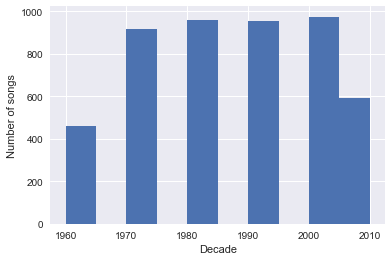

In [22]:
# visualizing songs per year
plt.hist(songs['Decade'])
plt.xlabel('Decade')
plt.ylabel('Number of songs')
plt.show()

Looking at this graph, we see that we have not lost too many songs from each decade after cleaning the data. The most obvious discrepencies we can observe here are that the 1960's has a bit less than 500 songs, and the 2010's have a bit less than 600 songs. These are both expected from how the data was originally constructed, with the years 1965-2015.

In [26]:
songs.groupby('Rank').size().head(20)

Rank
1     48
2     46
3     48
4     51
5     49
6     50
7     48
8     49
9     49
10    49
11    49
12    50
13    50
14    49
15    48
16    46
17    50
18    49
19    50
20    48
dtype: int64

Looking at counts of the top twenty ranks, we see that the top twenty ranks have not been too adversely affected by the data cleaning procedure. I can observe that rank 4 has 51 songs for some reason, which is an interesting error in the data. Fortunately only a two of the first 20 ranks are missing more than two or three songs.

TypeError: <lambda>() missing 1 required positional argument: 'height'

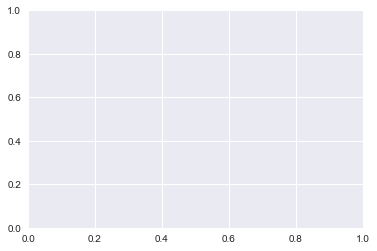

In [36]:
top_art = songs.groupby('Artist').size().sort_values(ascending=False).head(10)
plt.bar(top_art)